## Snehal Sawant

## Task 3 -  Prediction using Decision Trees

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.datasets as datasets

In [2]:
# Load dataset 
iris=datasets.load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Seprate data

In [3]:
# Forming the iris dataframe
df=pd.DataFrame(iris.data)
df.columns=iris.feature_names
df['target']=iris.target
print(df.head(5))



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


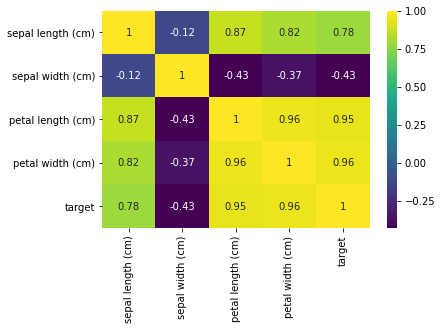

In [7]:
sns.heatmap(df.corr(),cmap="viridis",annot=True)

In [8]:
df.columns             # columns name in  dataset

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
iris.target_names           # classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
x=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]     #features
y=df[['target']]                                                       # target

In [11]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Train test split

In [13]:
# Import train test split function
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=100)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


## Decision Tree Classifier

In [15]:
 # Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier as DTC

In [16]:
# create Decision tree classifier object
clf= DTC() 

# Train Decision tree classifier
clf=clf.fit(x_train,y_train)

#Predict the response for test data
y_pred= clf.predict(x_test)
print(y_pred)
print(y_pred.shape)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2]
(30,)


In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree classifier is :",accuracy)

Accuracy of Decision tree classifier is : 0.9666666666666667


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



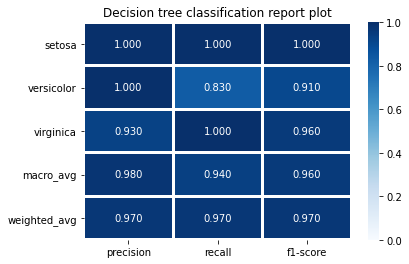

In [19]:
cr=pd.DataFrame()
cr['precision']=[1.0,1.0,0.93,0.98,0.97]
cr['recall']=[1.0,0.83,1.0,0.94,0.97]
cr['f1-score']=[1.0,0.91,0.96,0.96,0.97]
cr.index=['setosa','versicolor','virginica','macro_avg','weighted_avg']
sns.heatmap(cr,annot=True,fmt='.3f',vmin=0,vmax=1,linewidths=2,cmap='Blues')
plt.title('Decision tree classification report plot')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

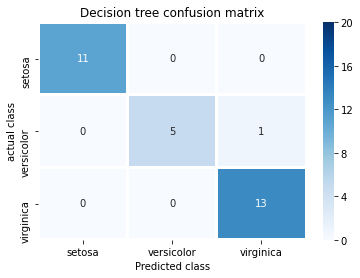

In [21]:
cm=confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(cm)
cm.index=cm.columns=iris.target_names
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=20,linewidths=2,cmap='Blues')
plt.title('Decision tree confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('actual class')
plt.show()

From above,setosa and verginica species are correctly classified, but there is  misclassification of versicolor species.

From confusion matrix 1  versicolor  species is classified as  verginica species.

## Let us visualize the Decision Tree to understand it better.

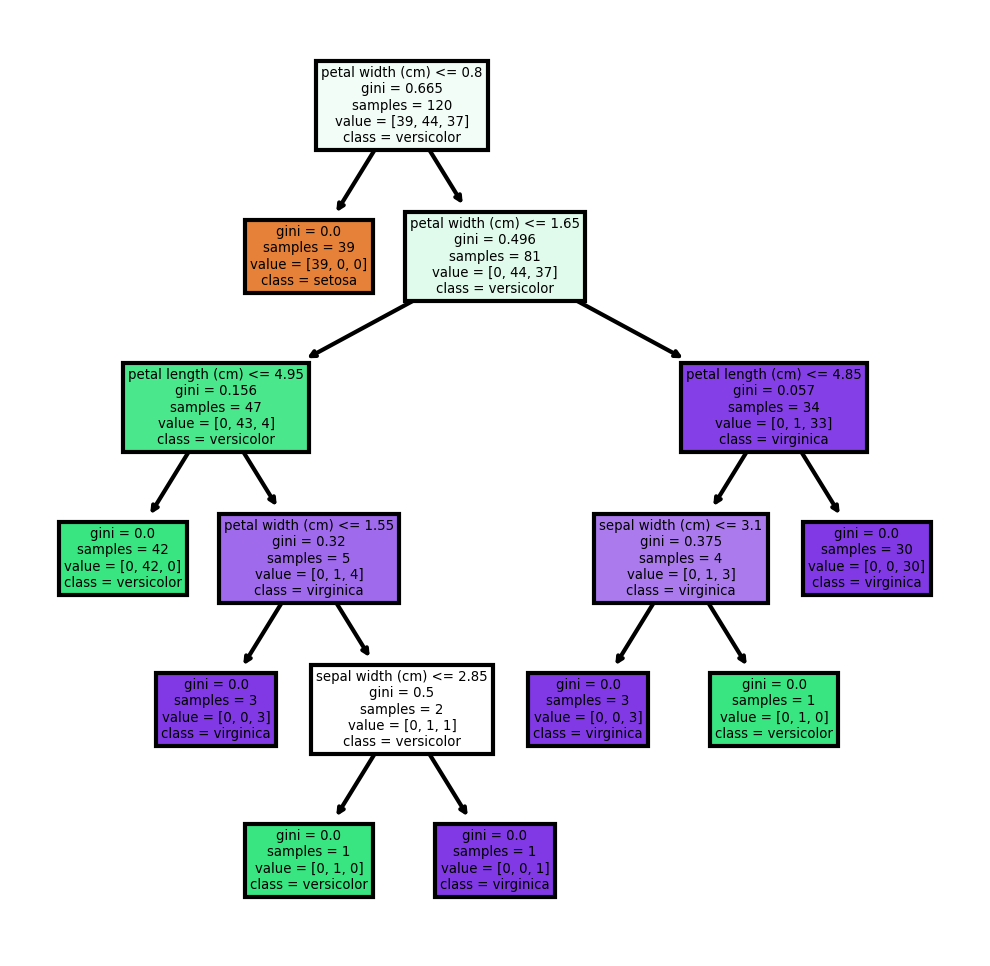

In [22]:
from sklearn import tree
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names =iris.feature_names, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

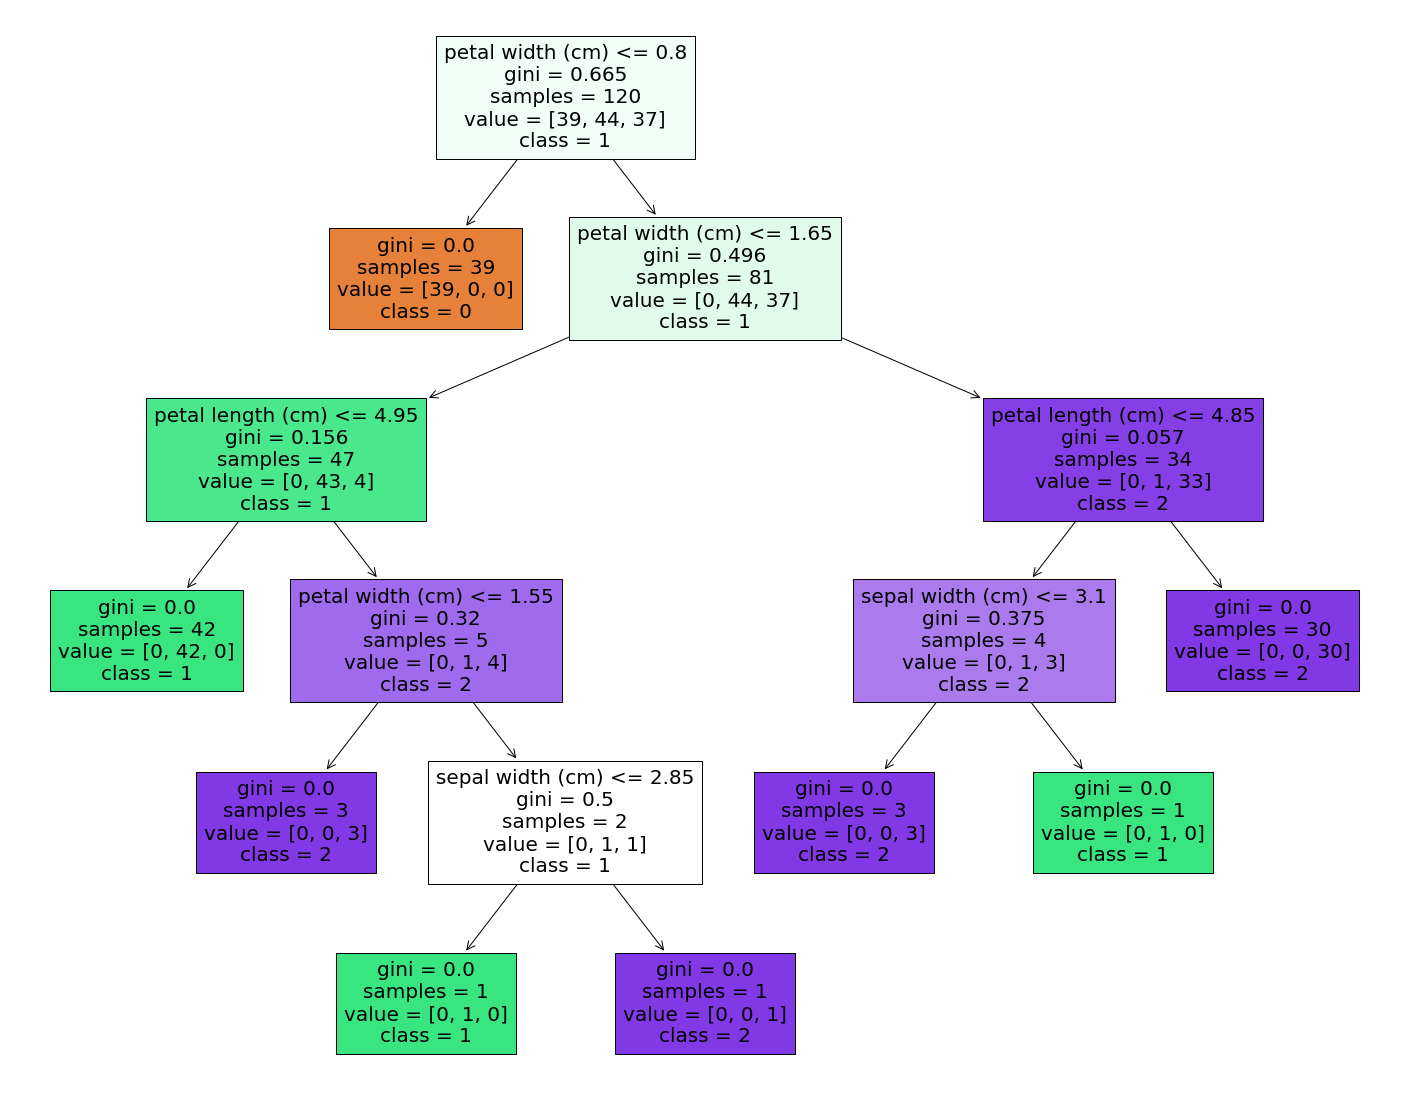

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=['0','1','2'],
                   filled=True)

# Predicting results for new data

In [24]:
print(iris.target_names[clf.predict([[4.0,3.0,1.0,9.0]])])

['virginica']


In [25]:
print(iris.target_names[clf.predict([[2.0,4.1,3.2,6.0]])])

['versicolor']


In [26]:
print(iris.target_names[clf.predict([[1.5,2.2,3,7]])])

['virginica']
